In [1]:
import numpy as np

import pandas as pd

import quaternion
from scipy.spatial.transform import Rotation as R

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/data_132574489412995799_.txt', sep=' ')
data = data[3:]

In [3]:
#  'Time', - внутреннее время окологрофа в мс делим на 1000 частота = 120Грц 
#  'Status', - значение енама 
#  'StatusInt', - енам числом 
#  'SphereRadius', - не должно было быть 
#  'SphereDistance', - не должно было быть  сдивгаем имена колонок 
#  'ConvergeDistance', - расстояние сведение глаз 
#  'LeftDirX', - направление вгляда y - вверх, тройка леdвая , x - вправо 
#  'LeftDirY', 
#  'LeftDirZ', 
#  'RightDirX',
#  'RightDirY', 
#  'RightDirZ', 
#  'LeftOrigX', - положение точки отсчета взгляда (центр взгляда )
#  'LeftOrigY', 
#  'LeftOrigZ',
#  'RightOrigX', 
#  'RightOrigY', 
#  'RightOrigZ', 
#  'PupilSizeL', - размер зрачка мл 
#  'PupilSizeR',
#  'HeadPosX', - положение головы, координата шлема 
#  'HeadPosY', 
#  'HeadPosZ', 
#  'HeadRotX', - кваратанион поворота 
#  'HeadRotY', 
#  'HeadRotZ',
#  'HeadRotW', 
#  'GlobalLeftDirX', - в глобальной системе координат 
#  'GlobalLeftDirY', 
#  'GlobalLeftDirZ',
#  'GlobalRightDirX', 
#  'GlobalRightDirY', 
#  'GlobalRightDirZ',
#  'GlobalLeftOrigX', 
#  'GlobalLeftOrigY', 
#  'GlobalLeftOrigZ',
#  'GlobalRightOrigX', 
#  'GlobalRightOrigY', 
#  'GlobalRightOrigZ'],

In [4]:
def coor_as_angle(Z, X, Y):
    hyp = np.sqrt(Z**2 + X**2 + Y**2)

    alpha = Z / hyp
    angle = np.arccos(alpha) 
    return angle

In [5]:
left_angle = coor_as_angle(data.LeftDirZ, data.LeftDirX, data.LeftDirY)
right_angle = coor_as_angle(data.RightDirZ, data.RightDirX, data.RightDirY)

left_angle, right_angle

(3        0.158228
 4        0.157908
 5        0.158107
 6        0.157573
 7        0.157801
            ...   
 61300    0.215661
 61301    0.216045
 61302    0.219573
 61303    0.235904
 61304    0.213802
 Length: 61302, dtype: float64,
 3        0.181863
 4        0.181840
 5        0.182109
 6        0.182048
 7        0.180163
            ...   
 61300    0.197753
 61301    0.211875
 61302    0.203880
 61303    0.204455
 61304    0.205049
 Length: 61302, dtype: float64)

In [6]:
# data.HeadRotW.T, data.HeadRotX.T, data.HeadRotY.T, data.HeadRotZ.T
rots = data[['HeadRotW', 'HeadRotX', 'HeadRotY', 'HeadRotZ']]
r = R.from_quat(rots.to_numpy().reshape(-1, 4))
rot_as_angle = r.as_euler('zyx', degrees=False)

rot_as_angle

array([[-0.0481864 ,  0.00887805, -3.12560704],
       [-0.0481864 ,  0.00887805, -3.12560704],
       [-0.0481864 ,  0.00887805, -3.12560704],
       ...,
       [-0.41961758, -0.05582958, -2.94616225],
       [-0.41961758, -0.05582958, -2.94616225],
       [-0.41961758, -0.05582958, -2.94616225]])

In [7]:
rot_angle =  pd.Series(rot_as_angle.T[0])

In [8]:
test_data = data[['HeadPosY', 'HeadPosZ',
                  'LeftDirY', 'LeftDirZ',
                  'RightDirY', 'RightDirZ',
                  'GlobalLeftDirY', 'GlobalLeftDirZ', 
                  'GlobalRightDirY', 'GlobalRightDirZ',
                  'GlobalLeftOrigY', 'GlobalLeftOrigZ',
                  'GlobalRightOrigY', 'GlobalRightOrigZ']]

test_data['left_angle'] = left_angle
test_data['right_angle'] = right_angle
test_data['rot_angle'] = rot_angle

In [9]:
test_data

,HeadPosY,HeadPosZ,LeftDirY,LeftDirZ,RightDirY,RightDirZ,GlobalLeftDirY,GlobalLeftDirZ,GlobalRightDirY,GlobalRightDirZ,GlobalLeftOrigY,GlobalLeftOrigZ,GlobalRightOrigY,GlobalRightOrigZ,left_angle,right_angle,rot_angle
3,1.264378,-0.047329,-0.108566,0.987503,-0.106018,0.983505,-0.157472,0.980115,-0.155756,0.975813,1.266094,-0.083705,1.267519,-0.082873,0.158228,0.181863,-0.048186
4,1.264378,-0.047329,-0.108780,0.987549,-0.105682,0.983505,-0.157472,0.980115,-0.155756,0.975813,1.266094,-0.083705,1.267519,-0.082873,0.157908,0.181840,-0.048186
5,1.264378,-0.047329,-0.108505,0.987518,-0.105179,0.983459,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,0.158107,0.182109,-0.048186
6,1.264378,-0.047329,-0.108475,0.987595,-0.105286,0.983459,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,0.157573,0.182048,-0.048186
7,1.264378,-0.047329,-0.109024,0.987564,-0.104767,0.983810,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,0.157801,0.180163,-0.048186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,1.628254,0.591860,-0.138885,0.976822,-0.167694,0.980499,-0.488857,0.839006,-0.522477,0.829013,1.636674,0.557042,1.649401,0.559827,0.215661,0.197753,-0.419618
61301,1.628254,0.591860,-0.138840,0.976746,-0.182877,0.977631,-0.488857,0.839006,-0.522477,0.829013,1.636674,0.557042,1.649401,0.559827,0.216045,0.211875,-0.419618
61302,1.628531,0.591142,-0.139420,0.975983,-0.173172,0.979279,-0.488478,0.838513,-0.539975,0.819551,1.636844,0.556365,1.649611,0.559020,0.219573,0.203880,NaN
61303,1.628531,0.591142,-0.146698,0.972290,-0.172852,0.979157,-0.488478,0.838513,-0.539975,0.819551,1.636844,0.556365,1.649611,0.559020,0.235904,0.204455,NaN


In [10]:
corr = test_data.corr()

<AxesSubplot:>

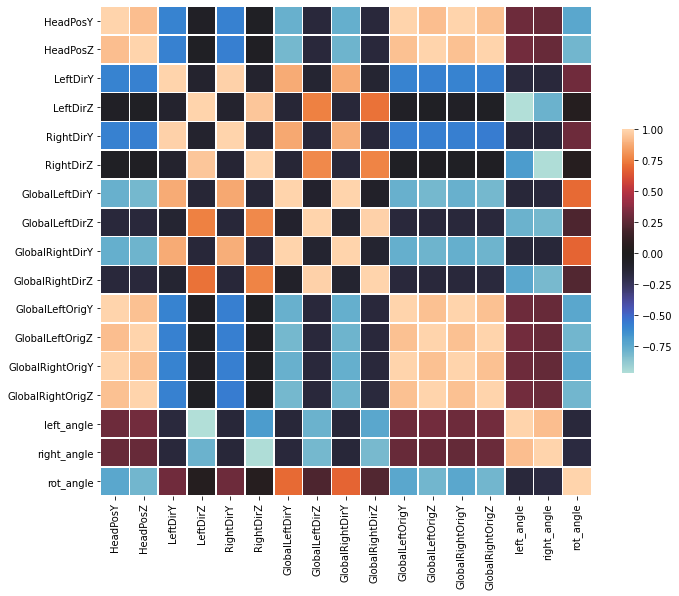

In [11]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, vmax=1, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
plot_data = test_data.copy()
plot_data['Time'] = data.Time

plot_data

,HeadPosY,HeadPosZ,LeftDirY,LeftDirZ,RightDirY,RightDirZ,GlobalLeftDirY,GlobalLeftDirZ,GlobalRightDirY,GlobalRightDirZ,GlobalLeftOrigY,GlobalLeftOrigZ,GlobalRightOrigY,GlobalRightOrigZ,left_angle,right_angle,rot_angle,Time
3,1.264378,-0.047329,-0.108566,0.987503,-0.106018,0.983505,-0.157472,0.980115,-0.155756,0.975813,1.266094,-0.083705,1.267519,-0.082873,0.158228,0.181863,-0.048186,2969601
4,1.264378,-0.047329,-0.108780,0.987549,-0.105682,0.983505,-0.157472,0.980115,-0.155756,0.975813,1.266094,-0.083705,1.267519,-0.082873,0.157908,0.181840,-0.048186,2969610
5,1.264378,-0.047329,-0.108505,0.987518,-0.105179,0.983459,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,0.158107,0.182109,-0.048186,2969618
6,1.264378,-0.047329,-0.108475,0.987595,-0.105286,0.983459,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,0.157573,0.182048,-0.048186,2969626
7,1.264378,-0.047329,-0.109024,0.987564,-0.104767,0.983810,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,0.157801,0.180163,-0.048186,2969643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,1.628254,0.591860,-0.138885,0.976822,-0.167694,0.980499,-0.488857,0.839006,-0.522477,0.829013,1.636674,0.557042,1.649401,0.559827,0.215661,0.197753,-0.419618,3512025
61301,1.628254,0.591860,-0.138840,0.976746,-0.182877,0.977631,-0.488857,0.839006,-0.522477,0.829013,1.636674,0.557042,1.649401,0.559827,0.216045,0.211875,-0.419618,3512033
61302,1.628531,0.591142,-0.139420,0.975983,-0.173172,0.979279,-0.488478,0.838513,-0.539975,0.819551,1.636844,0.556365,1.649611,0.559020,0.219573,0.203880,NaN,3512042
61303,1.628531,0.591142,-0.146698,0.972290,-0.172852,0.979157,-0.488478,0.838513,-0.539975,0.819551,1.636844,0.556365,1.649611,0.559020,0.235904,0.204455,NaN,3512050


In [13]:
def plot_table(value, a, b):
    fig, axs = plt.subplots(2, 2, figsize=(18, 11))
    fig.suptitle('Vertically stacked subplots')

    axs[0, 0].plot(plot_data.Time[a:b], plot_data[value][a:b])
    axs[0, 1].plot(plot_data.Time[a:b], plot_data['rot_angle'][a:b])
    axs[1, 0].plot(plot_data.Time[a:b], plot_data['left_angle'][a:b])
    axs[1, 1].plot(plot_data.Time[a:b], plot_data['right_angle'][a:b])

    axs[0, 0].set_title(value) 
    axs[0, 1].set_title('rot_angle')
    axs[1, 0].set_title('left_angle')
    axs[1, 1].set_title('right_angle')


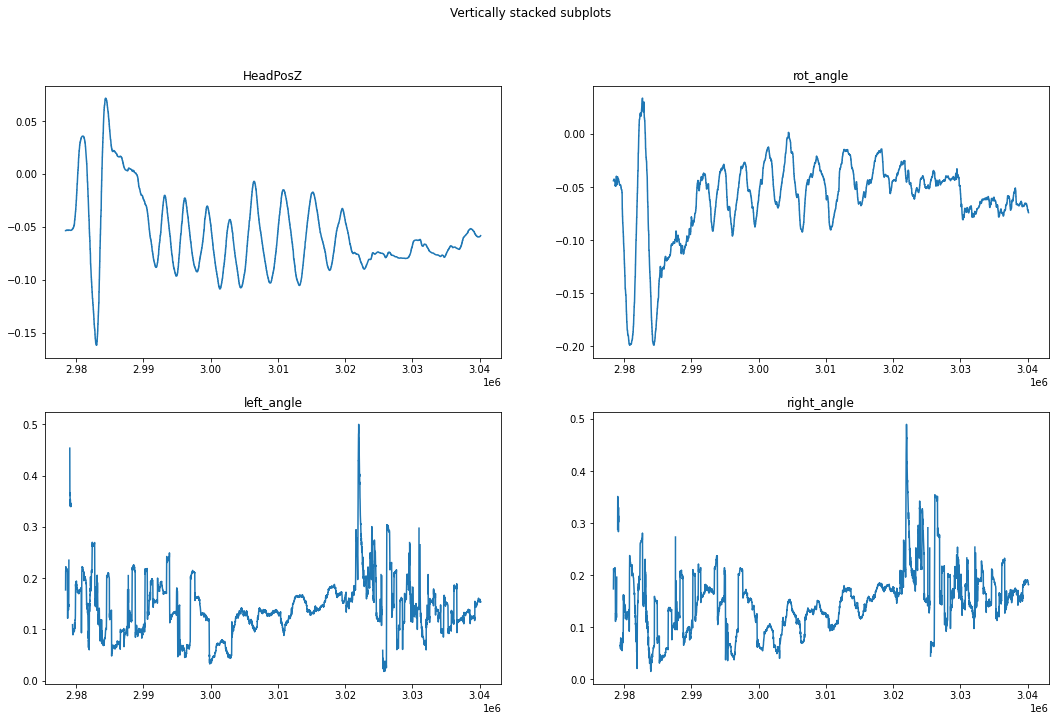

In [14]:
plot_table('HeadPosZ', 1000, 8000)

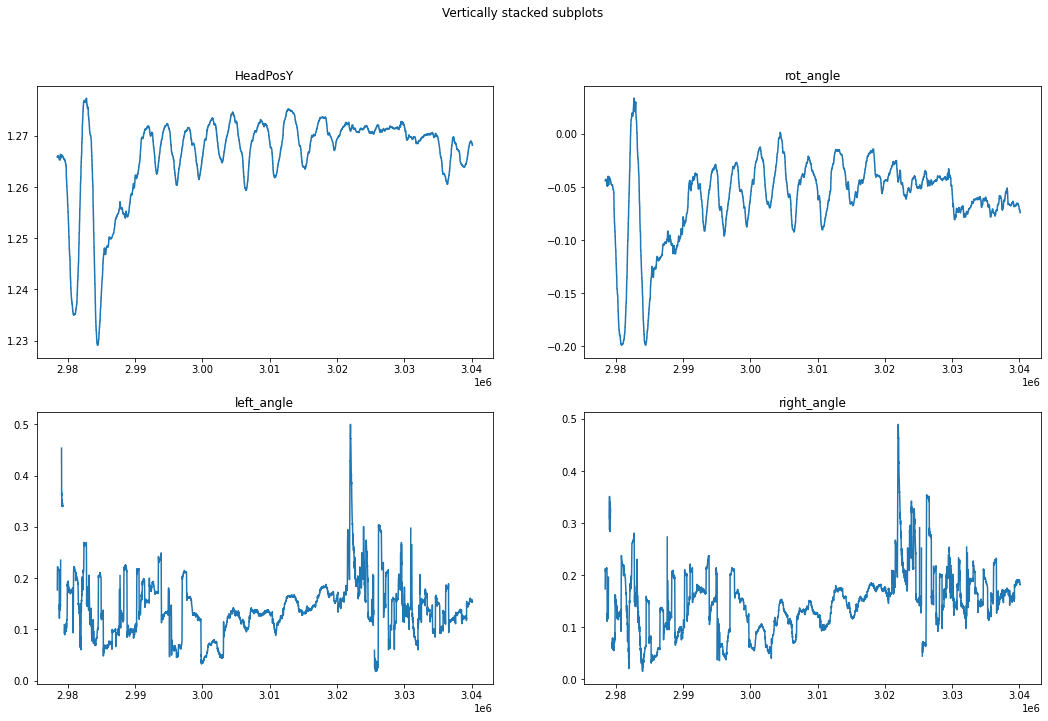

In [15]:
plot_table('HeadPosY', 1000, 8000)